In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [2]:
path = "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612"  #a short first test

In [3]:
k=.8
a=.8

In [4]:
infile = os.path.join(path, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 100
--field_type lattice
--method fixed-amplitude
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .01
--temp_final .000001
--intrinsic_curvature  0
--amplitude .8
--radius 1
--wavenumber .8
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100 
--dims 50 50



In [5]:
def sort_csv(filename, dtype=float, fct=(lambda x: abs(x))):
    if dtype==complex:
        dtype = str
        data=pd.read_csv(filename, index_col=0)
        data=data.applymap(complex)
        data=data.applymap(lambda x: fct(x))
    else:
        data=pd.read_csv(filename, index_col=0, dtype=dtype)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    return data


In [6]:
def complex_array_to_rgb(X, theme='dark', rmax=None):
    '''Takes an array of complex number and converts it to an array of [r, g, b],
    where phase gives hue and saturaton/value are given by the absolute value.
    Especially for use with imshow for complex plots.'''
    absmax = rmax or np.abs(X).max()
    Y = np.zeros(X.shape + (3,), dtype='float')
    Y[..., 0] = np.angle(X) / (2 * math.pi) % 1
    if theme == 'light':
        Y[..., 1] = np.clip(np.abs(X) / absmax, 0, 1)
        Y[..., 2] = 1
    elif theme == 'dark':
        Y[..., 1] = 1
        Y[..., 2] = np.clip(np.abs(X) / absmax, 0, 1)
    Y = matplotlib.colors.hsv_to_rgb(Y)
    return Y

def complex_heatmap(filename, theme='dark', rmax=None):
    data=pd.read_csv(filename, index_col=0)
    data.columns = data.columns.astype("float")
    data.index = data.index.astype("float")
    pd.DataFrame.sort_index(data, axis=0, inplace=True)
    pd.DataFrame.sort_index(data, axis=1, inplace=True)
    data=data.applymap(complex)
    plt.imshow(complex_array_to_rgb(data, theme, rmax))

<AxesSubplot:>

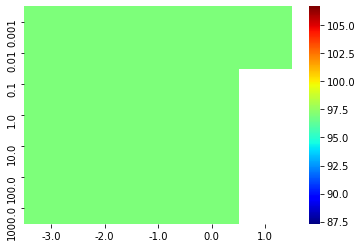

In [7]:
global_cutoff= sort_csv(path+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

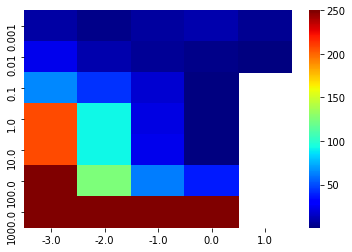

In [39]:
abs_amplitude2= sort_csv(path+"/field_energy.csv", dtype=complex)
sb.heatmap(abs_amplitude2, cmap='jet', vmax=250)

In [9]:
alphas =[str(x)+".0" for x in range(-3,2)]
cs =[str(10**x)+'.0' if x>=0 else str(10**x) for x in range(-3,4)]

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_0.1.csv
/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_1.0.csv


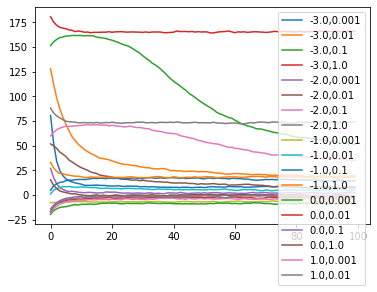

In [10]:
subject="field_energy"
for alpha in alphas:
    for c in cs[:4]:
        try:
            time_data= pd.read_csv(path+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

Clearly not equilibrated

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_10.0.csv


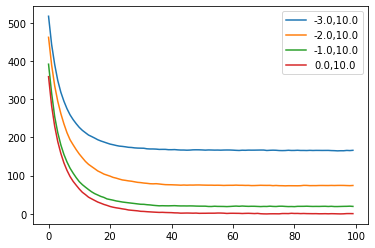

In [11]:
subject="field_energy"
for alpha in alphas:
    for c in cs[4:5]:
        try:
            time_data= pd.read_csv(path+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_100.0.csv


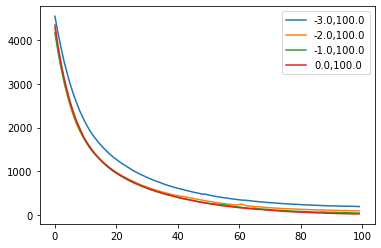

In [12]:
subject="field_energy"
for alpha in alphas:
    for c in cs[5:6]:
        try:
            time_data= pd.read_csv(path+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

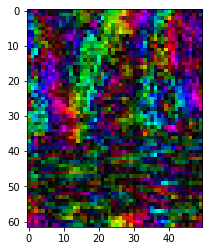

In [13]:
complex_heatmap(path+"/alpha_-3.0_C_1.0_snapshot.csv")

In [14]:
path2 = "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103532"  #this long one ran very fast, ~20mins

In [15]:
infile = os.path.join(path2, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 1000
--field_type lattice
--method fixed-amplitude
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .01
--temp_final .000001
--intrinsic_curvature  0
--amplitude .8
--radius 1
--wavenumber .8
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100 
--dims 50 50



<AxesSubplot:>

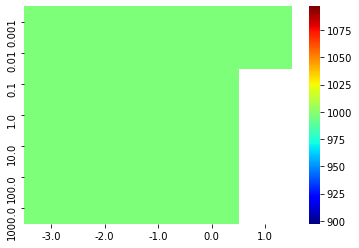

In [16]:
global_cutoff= sort_csv(path2+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_0.1.csv
/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_1.0.csv


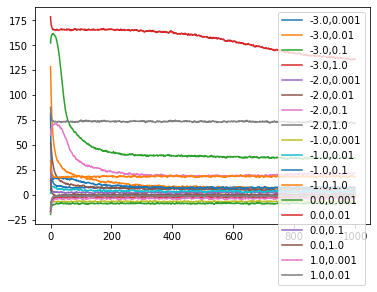

In [17]:
p=path2
subject="field_energy"
for alpha in alphas:
    for c in cs[:4]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_10.0.csv
/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_100.0.csv
/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_1000.0.csv


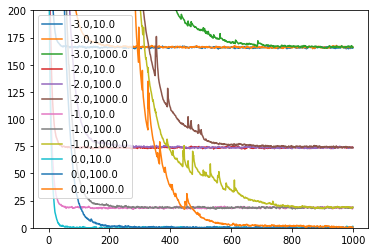

In [18]:
p=path2
subject="field_energy"
for alpha in alphas:
    for c in cs[4:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.ylim((0,200))
plt.show()

Converged on same energy levels with different (simulation) times and processes

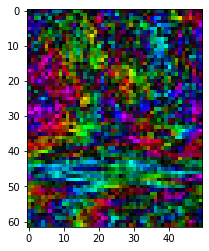

In [19]:
complex_heatmap(path2+"/alpha_-3.0_C_100.0_snapshot.csv")

But those energy levels don't look very minimized - has it just decided on 0 everywhere with fluctuations? 

Hard to tell when fluctuation amplitude is of order of developed field.  Try lower temperature.

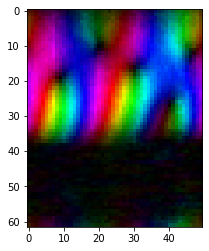

In [20]:
complex_heatmap(path2+"/alpha_-3.0_C_1.0_snapshot.csv")

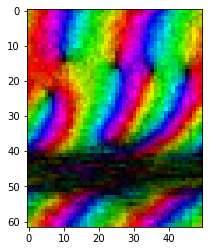

In [21]:
complex_heatmap(path2+"/alpha_-2.0_C_0.1_snapshot.csv") #this one still slowly increasing field energy

5 defects seems to be a thing on this surface, C=.01, n=6

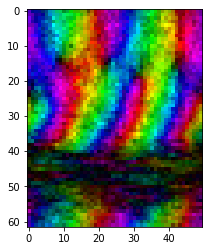

In [22]:
complex_heatmap(path2+"/alpha_-1.0_C_0.1_snapshot.csv") 

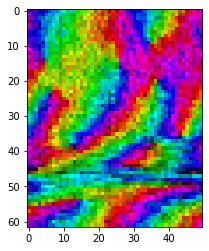

In [23]:
complex_heatmap(path2+"/alpha_-3.0_C_0.01_snapshot.csv") 

No need to simulate Cs that are so high that order is destroyed by curvature coupling at any curvature (need to go to a=.1, .2; k=.8; n=1 to check), high alpha.  

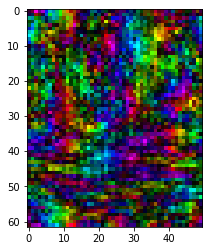

In [24]:
complex_heatmap(path2+"/alpha_-3.0_C_10.0_snapshot.csv")

Here that limit is between 1 and 10

No need to simulate all the small Cs if there is no difference between them

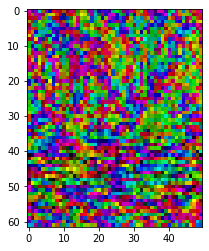

In [25]:
complex_heatmap(path2+"/alpha_-3.0_C_0.001_snapshot.csv") 

just has fluctuations obscuring everything

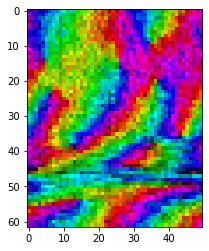

In [26]:
complex_heatmap(path2+"/alpha_-3.0_C_0.01_snapshot.csv") 

Intermediate, highly suscpetible to bigger fluctuations

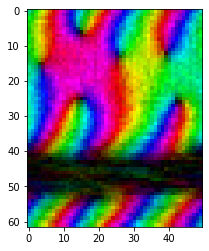

In [27]:
complex_heatmap(path2+"/alpha_-3.0_C_0.1_snapshot.csv") 

Limit of interesting

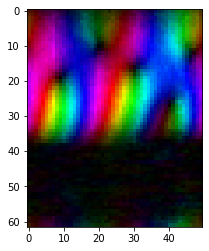

In [28]:
complex_heatmap(path2+"/alpha_-3.0_C_1.0_snapshot.csv") 

### Lower temperature

In [29]:
path3 = "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_111424" 

In [30]:
infile = os.path.join(path3, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 1000
--field_type lattice
--method fixed-amplitude
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .0001
--temp_final .000001
--intrinsic_curvature  0
--amplitude .8
--radius 1
--wavenumber .8
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100 
--dims 50 50



<AxesSubplot:>

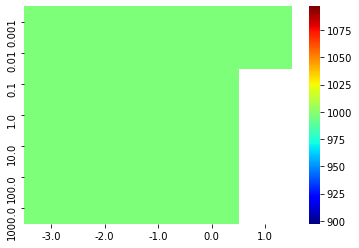

In [31]:
global_cutoff= sort_csv(path3+"/global_cutoff.csv")
sb.heatmap(global_cutoff, cmap='jet')

<AxesSubplot:>

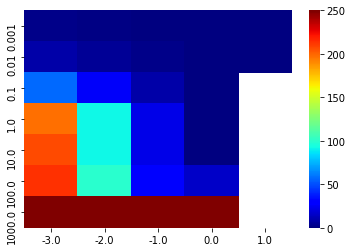

In [32]:
energy= sort_csv(path3+"/field_energy.csv")
sb.heatmap(energy, cmap='jet', vmax=250)

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_0.1.csv
/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_1.0.csv


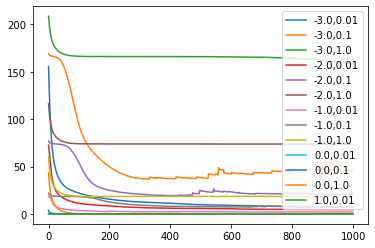

In [33]:
p=path3
subject="field_energy"
for alpha in alphas:
    for c in cs[1:4]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_10.0.csv
/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_103612/alpha_1.0_C_100.0.csv


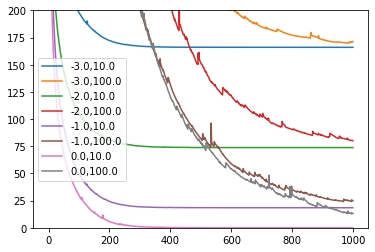

In [34]:
p=path3
subject="field_energy"
for alpha in alphas:
    for c in cs[4:6]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(path+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.ylim((0,200))
plt.show()

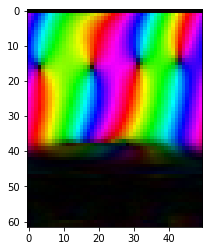

In [35]:
complex_heatmap(path3+"/alpha_-3.0_C_0.1_snapshot.csv") 

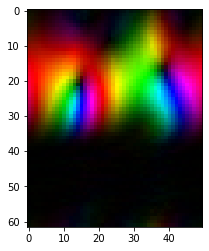

In [36]:
complex_heatmap(path3+"/alpha_-3.0_C_1.0_snapshot.csv") 

Less well equilibrated, configurations still confusing

But these simulations are very fast, I could run this 5x longer.

Well- equilibrated for C<100, no need to change temperature of run longer

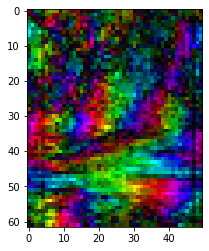

In [37]:
complex_heatmap(path3+"/alpha_-3.0_C_10.0_snapshot.csv") 

In [46]:
path3 = "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_125450" 

In [47]:
infile = os.path.join(path3, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 3000
--field_type lattice
--method fixed-amplitude
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .001
--temp_final .000001
--intrinsic_curvature  0
--amplitude .8
--radius 1
--wavenumber .8
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100 
--dims 50 50



<AxesSubplot:>

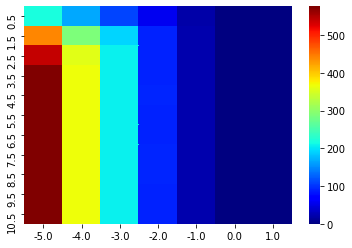

In [49]:
energy= sort_csv(path3+"/field_energy.csv")
sb.heatmap(energy, cmap='jet')

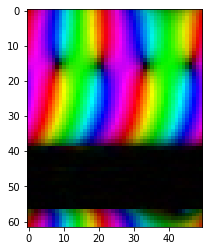

In [51]:
complex_heatmap(path3+"/alpha_-5.0_C_0.5_snapshot.csv") 

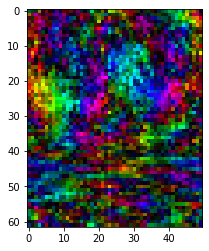

In [52]:
complex_heatmap(path3+"/alpha_-5.0_C_5.5_snapshot.csv") 

In [60]:
alphas =[str(x)+".0" for x in range(-5,2)]
cs =[str(x)+'.5' for x in range(0,11)]

['0.5', '1.5', '2.5', '3.5', '4.5', '5.5', '6.5', '7.5', '8.5', '9.5', '10.5']

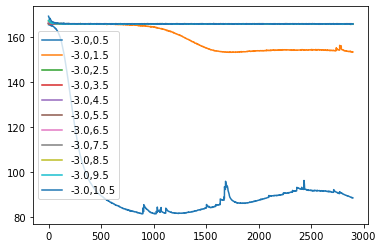

In [90]:
p=path3
subject="field_energy"
for alpha in alphas[2:3]:
    for c in cs[:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[100:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(p+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

Stop the row rotation sampling - mostly increases energy and prevent minimization

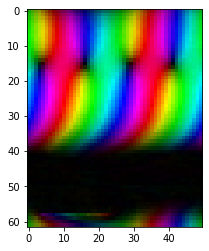

In [91]:
complex_heatmap(path3+"/alpha_-3.0_C_0.5_snapshot.csv") 

I remove row rotatation and look at a=.2 and n=1 cases to see how high C has to go.  

In [95]:
path4 =  "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_134611"#now without row rotation

In [99]:
infile = os.path.join(path4, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 3000
--field_type lattice
--method fixed-amplitude
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .001
--temp_final .000001
--intrinsic_curvature  0
--amplitude .8
--radius 1
--wavenumber .8
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100 
--dims 50 50



<AxesSubplot:>

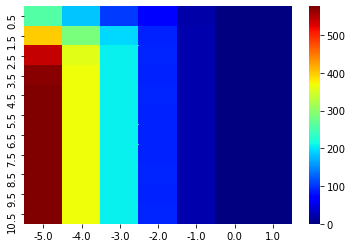

In [98]:
energy= sort_csv(path4+"/field_energy.csv")
sb.heatmap(energy, cmap='jet')

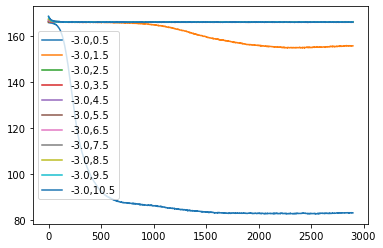

In [105]:
p=path4
subject="field_energy"
for alpha in alphas[2:3]:
    for c in cs[:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[100:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(p+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

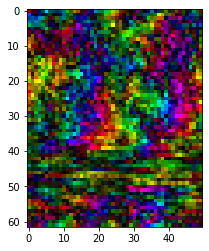

In [113]:
complex_heatmap(path4+"/alpha_-3.0_C_4.5_snapshot.csv") 

In [153]:
path5 =  "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_135535"#the one with a=.2
path6 =  "/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_140823"#the one with n=1
#is place where field is completely supressed at higher C in these?  is it necessary to go to C=10?

In [154]:
infile = os.path.join(path5, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(inf)

--n_steps 3000
--field_type lattice
--method fixed-amplitude
--alpha -1
--C 1
--u 1
--n 6
--kappa 0
--gamma 10
--temp .001
--temp_final .000001
--intrinsic_curvature  0
--amplitude .2
--radius 1
--wavenumber .8
--num_field_coeffs 2 3
--measure_every 50
--fieldsteps_per_ampstep  100 
--dims 50 50



<AxesSubplot:>

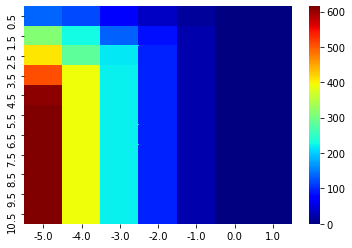

In [122]:
energy= sort_csv(path5+"/field_energy.csv")
sb.heatmap(energy, cmap='jet')

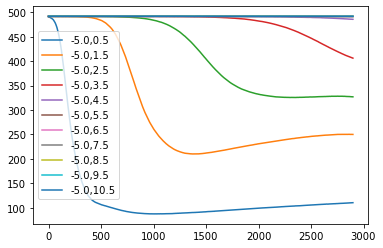

In [130]:
p=path5
subject="field_energy"
for alpha in alphas[:1]:
    for c in cs[:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[100:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(p+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

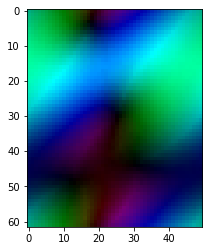

In [140]:
complex_heatmap(path5+"/alpha_-5.0_C_3.5_snapshot.csv") 

??

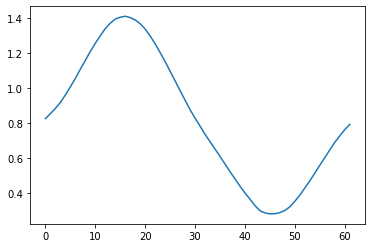

In [152]:
profile=pd.read_csv(path5+"/alpha_-5.0_C_3.5_profile_abs.csv", index_col=0)
plt.plot(profile)

In [147]:
profile

,0
0,0.824722
1,0.853477
2,0.883181
3,0.917339
4,0.959756
...,...
57,0.646810
58,0.689507
59,0.726674
60,0.762269


In [156]:
infile = os.path.join(path6, "infile.txt")
with open(infile) as F:
    inf=F.read()
print(infile)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jsk/cylinder/fixed_surfaces/test/2021-05-15_140823/infile.txt'

<AxesSubplot:>

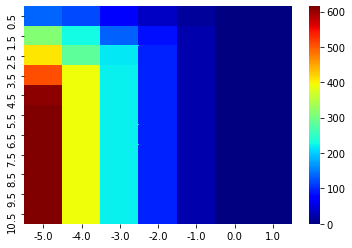

In [157]:
energy= sort_csv(path5+"/field_energy.csv")
sb.heatmap(energy, cmap='jet')

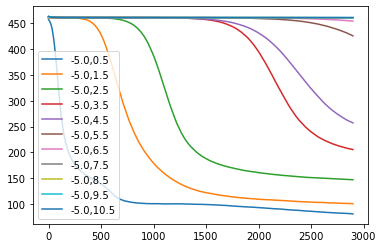

In [158]:
p=path6
subject="field_energy"
for alpha in alphas[:1]:
    for c in cs[:]:
        try:
            time_data= pd.read_csv(p+"/alpha_"+alpha+"_C_"+c+".csv")
            plt.plot([x*k for x in time_data.loc[100:,subject]], label=alpha+','+c)
        except FileNotFoundError:
            print(p+"/alpha_"+alpha+"_C_"+c+".csv")
            pass
plt.legend()
plt.show()

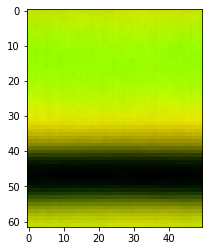

In [166]:
complex_heatmap(path6+"/alpha_-5.0_C_1.5_snapshot.csv") 

Less rotation induced at n=1 than n=6